In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot

In [2]:
import pycaret
print('PyCaret: %s' % pycaret.__version__)

PyCaret: 2.3.6


In [3]:
pip install pycaret

Note: you may need to restart the kernel to use updated packages.


In [4]:
from pandas import read_csv
train=pd.read_csv('C:/Users/mahsa/Desktop/M&M_NAO.csv')

In [5]:
data = train.sample(frac=0.9, random_state=50)
data_unseen = train.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))

Data for Modeling: (924, 11)
Unseen Data For Predictions (103, 11)


In [6]:
train.head()

,NPs_Type,Antiox_Medium,Core_size,Shape,Zeta Potential,Synthesis Tech,Coating,Dosage,Absorbance,Duration_h,DPPH
0,Chs_PVA_ZnO,solution,297.0,Rod,NaN,Chemical,uncoated,15.0,517.0,0.5,17.0
1,Chs_PVA_ZnO,solution,297.0,Rod,NaN,Chemical,uncoated,25.0,517.0,0.5,27.0
2,Chs_PVA_ZnO,solution,297.0,Rod,NaN,Chemical,uncoated,50.0,517.0,0.5,38.0
3,Chs_PVA_ZnO,solution,297.0,Rod,NaN,Chemical,uncoated,100.0,517.0,0.5,58.0
4,Chs_PVA_ZnO,solution,297.0,Rod,NaN,Chemical,uncoated,200.0,517.0,0.5,70.0


In [7]:
from pycaret.regression import *
reg1 = setup(train, target = 'DPPH', session_id=123, log_experiment=True, experiment_name='M&M_NAO.csv',normalize=True,transformation=False, transform_target=False,use_gpu=True,feature_selection = True)

,Description,Value
0,session_id,123
1,Target,DPPH
2,Original Data,"(1027, 11)"
3,Missing Values,True
4,Numeric Features,5
5,Categorical Features,5
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(718, 41)"


In [8]:
print(train.shape)

(1027, 11)


In [9]:
grid = setup(data=train, target=train.columns[-1], html=False, silent=False, verbose=False)

Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
NPs_Type,Categorical
Antiox_Medium,Categorical
Core_size,Numeric
Shape,Categorical
Zeta Potential,Numeric
Synthesis Tech,Categorical
Coating,Categorical
Dosage,Numeric
Absorbance,Numeric
Duration_h,Numeric


In [10]:
best_model = compare_models(fold=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,13.9199,355.8541,18.8408,0.6183,0.7183,0.5583,1.0533


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,13.9199,355.8541,18.8408,0.6183,0.7183,0.5583,1.0533
lasso,Lasso Regression,17.8054,479.6493,21.8901,0.4844,0.7932,0.8210,0.8333


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,13.4720,337.5314,18.3517,0.6378,0.7083,0.5586,0.7933
lr,Linear Regression,13.9199,355.8541,18.8408,0.6183,0.7183,0.5583,1.0533
lasso,Lasso Regression,17.8054,479.6493,21.8901,0.4844,0.7932,0.8210,0.8333


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,13.4720,337.5314,18.3517,0.6378,0.7083,0.5586,0.7933
lr,Linear Regression,13.9199,355.8541,18.8408,0.6183,0.7183,0.5583,1.0533
lasso,Lasso Regression,17.8054,479.6493,21.8901,0.4844,0.7932,0.8210,0.8333
en,Elastic Net,22.1305,662.3804,25.7263,0.2875,0.8729,0.9670,0.0200


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,13.4720,3.375314e+02,18.3517,6.378000e-01,0.7083,0.5586,0.7933
lr,Linear Regression,13.9199,3.558541e+02,18.8408,6.183000e-01,0.7183,0.5583,1.0533
lasso,Lasso Regression,17.8054,4.796493e+02,21.8901,4.844000e-01,0.7932,0.8210,0.8333
en,Elastic Net,22.1305,6.623804e+02,25.7263,2.875000e-01,0.8729,0.9670,0.0200
lar,Least Angle Regression,70633.5299,1.307239e+12,746998.7537,-1.518526e+09,3.3343,2058.9269,0.0167


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,13.4720,3.375314e+02,18.3517,6.378000e-01,0.7083,0.5586,0.7933
lr,Linear Regression,13.9199,3.558541e+02,18.8408,6.183000e-01,0.7183,0.5583,1.0533
lasso,Lasso Regression,17.8054,4.796493e+02,21.8901,4.844000e-01,0.7932,0.8210,0.8333
en,Elastic Net,22.1305,6.623804e+02,25.7263,2.875000e-01,0.8729,0.9670,0.0200
llar,Lasso Least Angle Regression,26.3773,9.325355e+02,30.5253,-2.100000e-03,0.8963,1.1416,0.0100
lar,Least Angle Regression,70633.5299,1.307239e+12,746998.7537,-1.518526e+09,3.3343,2058.9269,0.0167


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,13.4720,3.375314e+02,18.3517,6.378000e-01,0.7083,0.5586,0.7933
lr,Linear Regression,13.9199,3.558541e+02,18.8408,6.183000e-01,0.7183,0.5583,1.0533
omp,Orthogonal Matching Pursuit,16.0517,4.585085e+02,21.3816,5.086000e-01,0.7732,0.7466,0.0100
lasso,Lasso Regression,17.8054,4.796493e+02,21.8901,4.844000e-01,0.7932,0.8210,0.8333
en,Elastic Net,22.1305,6.623804e+02,25.7263,2.875000e-01,0.8729,0.9670,0.0200
llar,Lasso Least Angle Regression,26.3773,9.325355e+02,30.5253,-2.100000e-03,0.8963,1.1416,0.0100
lar,Least Angle Regression,70633.5299,1.307239e+12,746998.7537,-1.518526e+09,3.3343,2058.9269,0.0167


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,13.4720,3.375314e+02,18.3517,6.378000e-01,0.7083,0.5586,0.7933
br,Bayesian Ridge,13.4885,3.378096e+02,18.3590,6.375000e-01,0.7075,0.5602,0.0133
lr,Linear Regression,13.9199,3.558541e+02,18.8408,6.183000e-01,0.7183,0.5583,1.0533
omp,Orthogonal Matching Pursuit,16.0517,4.585085e+02,21.3816,5.086000e-01,0.7732,0.7466,0.0100
lasso,Lasso Regression,17.8054,4.796493e+02,21.8901,4.844000e-01,0.7932,0.8210,0.8333
en,Elastic Net,22.1305,6.623804e+02,25.7263,2.875000e-01,0.8729,0.9670,0.0200
llar,Lasso Least Angle Regression,26.3773,9.325355e+02,30.5253,-2.100000e-03,0.8963,1.1416,0.0100
lar,Least Angle Regression,70633.5299,1.307239e+12,746998.7537,-1.518526e+09,3.3343,2058.9269,0.0167


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,13.4720,3.375314e+02,18.3517,6.378000e-01,0.7083,0.5586,0.7933
br,Bayesian Ridge,13.4885,3.378096e+02,18.3590,6.375000e-01,0.7075,0.5602,0.0133
lr,Linear Regression,13.9199,3.558541e+02,18.8408,6.183000e-01,0.7183,0.5583,1.0533
omp,Orthogonal Matching Pursuit,16.0517,4.585085e+02,21.3816,5.086000e-01,0.7732,0.7466,0.0100
lasso,Lasso Regression,17.8054,4.796493e+02,21.8901,4.844000e-01,0.7932,0.8210,0.8333
en,Elastic Net,22.1305,6.623804e+02,25.7263,2.875000e-01,0.8729,0.9670,0.0200
llar,Lasso Least Angle Regression,26.3773,9.325355e+02,30.5253,-2.100000e-03,0.8963,1.1416,0.0100
par,Passive Aggressive Regressor,47.1782,5.208196e+03,67.0482,-4.496000e+00,1.1468,0.9880,0.0100
lar,Least Angle Regression,70633.5299,1.307239e+12,746998.7537,-1.518526e+09,3.3343,2058.9269,0.0167


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,13.4720,3.375314e+02,18.3517,6.378000e-01,0.7083,0.5586,0.7933
br,Bayesian Ridge,13.4885,3.378096e+02,18.3590,6.375000e-01,0.7075,0.5602,0.0133
lr,Linear Regression,13.9199,3.558541e+02,18.8408,6.183000e-01,0.7183,0.5583,1.0533
omp,Orthogonal Matching Pursuit,16.0517,4.585085e+02,21.3816,5.086000e-01,0.7732,0.7466,0.0100
lasso,Lasso Regression,17.8054,4.796493e+02,21.8901,4.844000e-01,0.7932,0.8210,0.8333
en,Elastic Net,22.1305,6.623804e+02,25.7263,2.875000e-01,0.8729,0.9670,0.0200
huber,Huber Regressor,21.9179,6.805054e+02,25.9625,2.731000e-01,0.8819,0.9660,0.0267
llar,Lasso Least Angle Regression,26.3773,9.325355e+02,30.5253,-2.100000e-03,0.8963,1.1416,0.0100
par,Passive Aggressive Regressor,47.1782,5.208196e+03,67.0482,-4.496000e+00,1.1468,0.9880,0.0100
lar,Least Angle Regression,70633.5299,1.307239e+12,746998.7537,-1.518526e+09,3.3343,2058.9269,0.0167


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,13.4720,3.375314e+02,18.3517,6.378000e-01,0.7083,0.5586,0.7933
br,Bayesian Ridge,13.4885,3.378096e+02,18.3590,6.375000e-01,0.7075,0.5602,0.0133
lr,Linear Regression,13.9199,3.558541e+02,18.8408,6.183000e-01,0.7183,0.5583,1.0533
knn,K Neighbors Regressor,13.0197,3.624418e+02,18.9653,6.130000e-01,0.6778,0.5823,0.0133
omp,Orthogonal Matching Pursuit,16.0517,4.585085e+02,21.3816,5.086000e-01,0.7732,0.7466,0.0100
lasso,Lasso Regression,17.8054,4.796493e+02,21.8901,4.844000e-01,0.7932,0.8210,0.8333
en,Elastic Net,22.1305,6.623804e+02,25.7263,2.875000e-01,0.8729,0.9670,0.0200
huber,Huber Regressor,21.9179,6.805054e+02,25.9625,2.731000e-01,0.8819,0.9660,0.0267
llar,Lasso Least Angle Regression,26.3773,9.325355e+02,30.5253,-2.100000e-03,0.8963,1.1416,0.0100
par,Passive Aggressive Regressor,47.1782,5.208196e+03,67.0482,-4.496000e+00,1.1468,0.9880,0.0100


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dt,Decision Tree Regressor,10.8818,3.153708e+02,17.7579,6.597000e-01,0.7368,0.3305,0.0100
ridge,Ridge Regression,13.4720,3.375314e+02,18.3517,6.378000e-01,0.7083,0.5586,0.7933
br,Bayesian Ridge,13.4885,3.378096e+02,18.3590,6.375000e-01,0.7075,0.5602,0.0133
lr,Linear Regression,13.9199,3.558541e+02,18.8408,6.183000e-01,0.7183,0.5583,1.0533
knn,K Neighbors Regressor,13.0197,3.624418e+02,18.9653,6.130000e-01,0.6778,0.5823,0.0133
omp,Orthogonal Matching Pursuit,16.0517,4.585085e+02,21.3816,5.086000e-01,0.7732,0.7466,0.0100
lasso,Lasso Regression,17.8054,4.796493e+02,21.8901,4.844000e-01,0.7932,0.8210,0.8333
en,Elastic Net,22.1305,6.623804e+02,25.7263,2.875000e-01,0.8729,0.9670,0.0200
huber,Huber Regressor,21.9179,6.805054e+02,25.9625,2.731000e-01,0.8819,0.9660,0.0267
llar,Lasso Least Angle Regression,26.3773,9.325355e+02,30.5253,-2.100000e-03,0.8963,1.1416,0.0100


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,9.4620,2.131351e+02,14.5194,7.728000e-01,0.5640,0.3333,0.1100
dt,Decision Tree Regressor,10.8818,3.153708e+02,17.7579,6.597000e-01,0.7368,0.3305,0.0100
ridge,Ridge Regression,13.4720,3.375314e+02,18.3517,6.378000e-01,0.7083,0.5586,0.7933
br,Bayesian Ridge,13.4885,3.378096e+02,18.3590,6.375000e-01,0.7075,0.5602,0.0133
lr,Linear Regression,13.9199,3.558541e+02,18.8408,6.183000e-01,0.7183,0.5583,1.0533
knn,K Neighbors Regressor,13.0197,3.624418e+02,18.9653,6.130000e-01,0.6778,0.5823,0.0133
omp,Orthogonal Matching Pursuit,16.0517,4.585085e+02,21.3816,5.086000e-01,0.7732,0.7466,0.0100
lasso,Lasso Regression,17.8054,4.796493e+02,21.8901,4.844000e-01,0.7932,0.8210,0.8333
en,Elastic Net,22.1305,6.623804e+02,25.7263,2.875000e-01,0.8729,0.9670,0.0200
huber,Huber Regressor,21.9179,6.805054e+02,25.9625,2.731000e-01,0.8819,0.9660,0.0267


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,9.4620,2.131351e+02,14.5194,7.728000e-01,0.5640,0.3333,0.1100
et,Extra Trees Regressor,9.0484,2.259370e+02,14.9967,7.582000e-01,0.5843,0.2698,0.1200
dt,Decision Tree Regressor,10.8818,3.153708e+02,17.7579,6.597000e-01,0.7368,0.3305,0.0100
ridge,Ridge Regression,13.4720,3.375314e+02,18.3517,6.378000e-01,0.7083,0.5586,0.7933
br,Bayesian Ridge,13.4885,3.378096e+02,18.3590,6.375000e-01,0.7075,0.5602,0.0133
lr,Linear Regression,13.9199,3.558541e+02,18.8408,6.183000e-01,0.7183,0.5583,1.0533
knn,K Neighbors Regressor,13.0197,3.624418e+02,18.9653,6.130000e-01,0.6778,0.5823,0.0133
omp,Orthogonal Matching Pursuit,16.0517,4.585085e+02,21.3816,5.086000e-01,0.7732,0.7466,0.0100
lasso,Lasso Regression,17.8054,4.796493e+02,21.8901,4.844000e-01,0.7932,0.8210,0.8333
en,Elastic Net,22.1305,6.623804e+02,25.7263,2.875000e-01,0.8729,0.9670,0.0200


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,9.4620,2.131351e+02,14.5194,7.728000e-01,0.5640,0.3333,0.1100
et,Extra Trees Regressor,9.0484,2.259370e+02,14.9967,7.582000e-01,0.5843,0.2698,0.1200
dt,Decision Tree Regressor,10.8818,3.153708e+02,17.7579,6.597000e-01,0.7368,0.3305,0.0100
ridge,Ridge Regression,13.4720,3.375314e+02,18.3517,6.378000e-01,0.7083,0.5586,0.7933
br,Bayesian Ridge,13.4885,3.378096e+02,18.3590,6.375000e-01,0.7075,0.5602,0.0133
lr,Linear Regression,13.9199,3.558541e+02,18.8408,6.183000e-01,0.7183,0.5583,1.0533
knn,K Neighbors Regressor,13.0197,3.624418e+02,18.9653,6.130000e-01,0.6778,0.5823,0.0133
ada,AdaBoost Regressor,15.6596,3.791048e+02,19.4326,5.942000e-01,0.7193,0.6712,0.0267
omp,Orthogonal Matching Pursuit,16.0517,4.585085e+02,21.3816,5.086000e-01,0.7732,0.7466,0.0100
lasso,Lasso Regression,17.8054,4.796493e+02,21.8901,4.844000e-01,0.7932,0.8210,0.8333


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,9.4620,2.131351e+02,14.5194,7.728000e-01,0.5640,0.3333,0.1100
et,Extra Trees Regressor,9.0484,2.259370e+02,14.9967,7.582000e-01,0.5843,0.2698,0.1200
gbr,Gradient Boosting Regressor,10.8866,2.410305e+02,15.4762,7.424000e-01,0.6156,0.4102,0.0400
dt,Decision Tree Regressor,10.8818,3.153708e+02,17.7579,6.597000e-01,0.7368,0.3305,0.0100
ridge,Ridge Regression,13.4720,3.375314e+02,18.3517,6.378000e-01,0.7083,0.5586,0.7933
br,Bayesian Ridge,13.4885,3.378096e+02,18.3590,6.375000e-01,0.7075,0.5602,0.0133
lr,Linear Regression,13.9199,3.558541e+02,18.8408,6.183000e-01,0.7183,0.5583,1.0533
knn,K Neighbors Regressor,13.0197,3.624418e+02,18.9653,6.130000e-01,0.6778,0.5823,0.0133
ada,AdaBoost Regressor,15.6596,3.791048e+02,19.4326,5.942000e-01,0.7193,0.6712,0.0267
omp,Orthogonal Matching Pursuit,16.0517,4.585085e+02,21.3816,5.086000e-01,0.7732,0.7466,0.0100


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,9.4620,2.131351e+02,14.5194,7.728000e-01,0.5640,0.3333,0.1100
et,Extra Trees Regressor,9.0484,2.259370e+02,14.9967,7.582000e-01,0.5843,0.2698,0.1200
gbr,Gradient Boosting Regressor,10.8866,2.410305e+02,15.4762,7.424000e-01,0.6156,0.4102,0.0400
lightgbm,Light Gradient Boosting Machine,11.2592,2.682509e+02,16.3034,7.139000e-01,0.6064,0.4284,0.2200
dt,Decision Tree Regressor,10.8818,3.153708e+02,17.7579,6.597000e-01,0.7368,0.3305,0.0100
ridge,Ridge Regression,13.4720,3.375314e+02,18.3517,6.378000e-01,0.7083,0.5586,0.7933
br,Bayesian Ridge,13.4885,3.378096e+02,18.3590,6.375000e-01,0.7075,0.5602,0.0133
lr,Linear Regression,13.9199,3.558541e+02,18.8408,6.183000e-01,0.7183,0.5583,1.0533
knn,K Neighbors Regressor,13.0197,3.624418e+02,18.9653,6.130000e-01,0.6778,0.5823,0.0133
ada,AdaBoost Regressor,15.6596,3.791048e+02,19.4326,5.942000e-01,0.7193,0.6712,0.0267


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,9.4620,2.131351e+02,14.5194,7.728000e-01,0.5640,0.3333,0.1100
et,Extra Trees Regressor,9.0484,2.259370e+02,14.9967,7.582000e-01,0.5843,0.2698,0.1200
gbr,Gradient Boosting Regressor,10.8866,2.410305e+02,15.4762,7.424000e-01,0.6156,0.4102,0.0400
lightgbm,Light Gradient Boosting Machine,11.2592,2.682509e+02,16.3034,7.139000e-01,0.6064,0.4284,0.2200
dt,Decision Tree Regressor,10.8818,3.153708e+02,17.7579,6.597000e-01,0.7368,0.3305,0.0100
ridge,Ridge Regression,13.4720,3.375314e+02,18.3517,6.378000e-01,0.7083,0.5586,0.7933
br,Bayesian Ridge,13.4885,3.378096e+02,18.3590,6.375000e-01,0.7075,0.5602,0.0133
lr,Linear Regression,13.9199,3.558541e+02,18.8408,6.183000e-01,0.7183,0.5583,1.0533
knn,K Neighbors Regressor,13.0197,3.624418e+02,18.9653,6.130000e-01,0.6778,0.5823,0.0133
ada,AdaBoost Regressor,15.6596,3.791048e+02,19.4326,5.942000e-01,0.7193,0.6712,0.0267


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,9.4620,2.131351e+02,14.5194,7.728000e-01,0.5640,0.3333,0.1100
et,Extra Trees Regressor,9.0484,2.259370e+02,14.9967,7.582000e-01,0.5843,0.2698,0.1200
gbr,Gradient Boosting Regressor,10.8866,2.410305e+02,15.4762,7.424000e-01,0.6156,0.4102,0.0400
lightgbm,Light Gradient Boosting Machine,11.2592,2.682509e+02,16.3034,7.139000e-01,0.6064,0.4284,0.2200
dt,Decision Tree Regressor,10.8818,3.153708e+02,17.7579,6.597000e-01,0.7368,0.3305,0.0100
ridge,Ridge Regression,13.4720,3.375314e+02,18.3517,6.378000e-01,0.7083,0.5586,0.7933
br,Bayesian Ridge,13.4885,3.378096e+02,18.3590,6.375000e-01,0.7075,0.5602,0.0133
lr,Linear Regression,13.9199,3.558541e+02,18.8408,6.183000e-01,0.7183,0.5583,1.0533
knn,K Neighbors Regressor,13.0197,3.624418e+02,18.9653,6.130000e-01,0.6778,0.5823,0.0133
ada,AdaBoost Regressor,15.6596,3.791048e+02,19.4326,5.942000e-01,0.7193,0.6712,0.0267


In [11]:
top3 = compare_models(n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,13.8124,348.1556,18.576,0.623,0.7129,0.5566,0.008


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,13.8124,348.1556,18.5760,0.6230,0.7129,0.5566,0.008
lasso,Lasso Regression,17.8272,482.1035,21.9175,0.4742,0.7930,0.8177,0.008


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,13.4415,335.7027,18.2538,0.6365,0.6961,0.5448,0.008
lr,Linear Regression,13.8124,348.1556,18.5760,0.6230,0.7129,0.5566,0.008
lasso,Lasso Regression,17.8272,482.1035,21.9175,0.4742,0.7930,0.8177,0.008


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,13.4415,335.7027,18.2538,0.6365,0.6961,0.5448,0.008
lr,Linear Regression,13.8124,348.1556,18.5760,0.6230,0.7129,0.5566,0.008
lasso,Lasso Regression,17.8272,482.1035,21.9175,0.4742,0.7930,0.8177,0.008
en,Elastic Net,22.2812,669.8526,25.8548,0.2690,0.8783,0.9701,0.009


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,1.344150e+01,3.357027e+02,1.825380e+01,6.365000e-01,0.6961,5.448000e-01,0.008
lr,Linear Regression,1.381240e+01,3.481556e+02,1.857600e+01,6.230000e-01,0.7129,5.566000e-01,0.008
lasso,Lasso Regression,1.782720e+01,4.821035e+02,2.191750e+01,4.742000e-01,0.7930,8.177000e-01,0.008
en,Elastic Net,2.228120e+01,6.698526e+02,2.585480e+01,2.690000e-01,0.8783,9.701000e-01,0.009
lar,Least Angle Regression,1.204716e+08,1.026389e+19,1.013458e+09,-1.035275e+16,5.4022,2.117513e+06,0.009


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,1.344150e+01,3.357027e+02,1.825380e+01,6.365000e-01,0.6961,5.448000e-01,0.008
lr,Linear Regression,1.381240e+01,3.481556e+02,1.857600e+01,6.230000e-01,0.7129,5.566000e-01,0.008
lasso,Lasso Regression,1.782720e+01,4.821035e+02,2.191750e+01,4.742000e-01,0.7930,8.177000e-01,0.008
en,Elastic Net,2.228120e+01,6.698526e+02,2.585480e+01,2.690000e-01,0.8783,9.701000e-01,0.009
llar,Lasso Least Angle Regression,2.640760e+01,9.341222e+02,3.054220e+01,-1.560000e-02,0.8957,1.141400e+00,0.007
lar,Least Angle Regression,1.204716e+08,1.026389e+19,1.013458e+09,-1.035275e+16,5.4022,2.117513e+06,0.009


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,1.344150e+01,3.357027e+02,1.825380e+01,6.365000e-01,0.6961,5.448000e-01,0.008
lr,Linear Regression,1.381240e+01,3.481556e+02,1.857600e+01,6.230000e-01,0.7129,5.566000e-01,0.008
omp,Orthogonal Matching Pursuit,1.593040e+01,4.605367e+02,2.140970e+01,4.987000e-01,0.7781,7.568000e-01,0.007
lasso,Lasso Regression,1.782720e+01,4.821035e+02,2.191750e+01,4.742000e-01,0.7930,8.177000e-01,0.008
en,Elastic Net,2.228120e+01,6.698526e+02,2.585480e+01,2.690000e-01,0.8783,9.701000e-01,0.009
llar,Lasso Least Angle Regression,2.640760e+01,9.341222e+02,3.054220e+01,-1.560000e-02,0.8957,1.141400e+00,0.007
lar,Least Angle Regression,1.204716e+08,1.026389e+19,1.013458e+09,-1.035275e+16,5.4022,2.117513e+06,0.009


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,1.344810e+01,3.355852e+02,1.825030e+01,6.367000e-01,0.6962,5.461000e-01,0.007
ridge,Ridge Regression,1.344150e+01,3.357027e+02,1.825380e+01,6.365000e-01,0.6961,5.448000e-01,0.008
lr,Linear Regression,1.381240e+01,3.481556e+02,1.857600e+01,6.230000e-01,0.7129,5.566000e-01,0.008
omp,Orthogonal Matching Pursuit,1.593040e+01,4.605367e+02,2.140970e+01,4.987000e-01,0.7781,7.568000e-01,0.007
lasso,Lasso Regression,1.782720e+01,4.821035e+02,2.191750e+01,4.742000e-01,0.7930,8.177000e-01,0.008
en,Elastic Net,2.228120e+01,6.698526e+02,2.585480e+01,2.690000e-01,0.8783,9.701000e-01,0.009
llar,Lasso Least Angle Regression,2.640760e+01,9.341222e+02,3.054220e+01,-1.560000e-02,0.8957,1.141400e+00,0.007
lar,Least Angle Regression,1.204716e+08,1.026389e+19,1.013458e+09,-1.035275e+16,5.4022,2.117513e+06,0.009


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,1.344810e+01,3.355852e+02,1.825030e+01,6.367000e-01,0.6962,5.461000e-01,0.007
ridge,Ridge Regression,1.344150e+01,3.357027e+02,1.825380e+01,6.365000e-01,0.6961,5.448000e-01,0.008
lr,Linear Regression,1.381240e+01,3.481556e+02,1.857600e+01,6.230000e-01,0.7129,5.566000e-01,0.008
omp,Orthogonal Matching Pursuit,1.593040e+01,4.605367e+02,2.140970e+01,4.987000e-01,0.7781,7.568000e-01,0.007
lasso,Lasso Regression,1.782720e+01,4.821035e+02,2.191750e+01,4.742000e-01,0.7930,8.177000e-01,0.008
en,Elastic Net,2.228120e+01,6.698526e+02,2.585480e+01,2.690000e-01,0.8783,9.701000e-01,0.009
llar,Lasso Least Angle Regression,2.640760e+01,9.341222e+02,3.054220e+01,-1.560000e-02,0.8957,1.141400e+00,0.007
par,Passive Aggressive Regressor,2.375158e+02,6.043423e+05,4.852190e+02,-6.419359e+02,1.4385,5.469800e+00,0.008
lar,Least Angle Regression,1.204716e+08,1.026389e+19,1.013458e+09,-1.035275e+16,5.4022,2.117513e+06,0.009


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,1.344810e+01,3.355852e+02,1.825030e+01,6.367000e-01,0.6962,5.461000e-01,0.007
ridge,Ridge Regression,1.344150e+01,3.357027e+02,1.825380e+01,6.365000e-01,0.6961,5.448000e-01,0.008
lr,Linear Regression,1.381240e+01,3.481556e+02,1.857600e+01,6.230000e-01,0.7129,5.566000e-01,0.008
omp,Orthogonal Matching Pursuit,1.593040e+01,4.605367e+02,2.140970e+01,4.987000e-01,0.7781,7.568000e-01,0.007
lasso,Lasso Regression,1.782720e+01,4.821035e+02,2.191750e+01,4.742000e-01,0.7930,8.177000e-01,0.008
en,Elastic Net,2.228120e+01,6.698526e+02,2.585480e+01,2.690000e-01,0.8783,9.701000e-01,0.009
huber,Huber Regressor,2.323530e+01,7.471672e+02,2.723250e+01,1.830000e-01,0.8736,1.010500e+00,0.022
llar,Lasso Least Angle Regression,2.640760e+01,9.341222e+02,3.054220e+01,-1.560000e-02,0.8957,1.141400e+00,0.007
par,Passive Aggressive Regressor,2.375158e+02,6.043423e+05,4.852190e+02,-6.419359e+02,1.4385,5.469800e+00,0.008
lar,Least Angle Regression,1.204716e+08,1.026389e+19,1.013458e+09,-1.035275e+16,5.4022,2.117513e+06,0.009


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,1.344810e+01,3.355852e+02,1.825030e+01,6.367000e-01,0.6962,5.461000e-01,0.007
ridge,Ridge Regression,1.344150e+01,3.357027e+02,1.825380e+01,6.365000e-01,0.6961,5.448000e-01,0.008
knn,K Neighbors Regressor,1.265280e+01,3.378775e+02,1.828280e+01,6.350000e-01,0.6571,5.658000e-01,0.012
lr,Linear Regression,1.381240e+01,3.481556e+02,1.857600e+01,6.230000e-01,0.7129,5.566000e-01,0.008
omp,Orthogonal Matching Pursuit,1.593040e+01,4.605367e+02,2.140970e+01,4.987000e-01,0.7781,7.568000e-01,0.007
lasso,Lasso Regression,1.782720e+01,4.821035e+02,2.191750e+01,4.742000e-01,0.7930,8.177000e-01,0.008
en,Elastic Net,2.228120e+01,6.698526e+02,2.585480e+01,2.690000e-01,0.8783,9.701000e-01,0.009
huber,Huber Regressor,2.323530e+01,7.471672e+02,2.723250e+01,1.830000e-01,0.8736,1.010500e+00,0.022
llar,Lasso Least Angle Regression,2.640760e+01,9.341222e+02,3.054220e+01,-1.560000e-02,0.8957,1.141400e+00,0.007
par,Passive Aggressive Regressor,2.375158e+02,6.043423e+05,4.852190e+02,-6.419359e+02,1.4385,5.469800e+00,0.008


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dt,Decision Tree Regressor,9.373200e+00,2.392568e+02,1.521070e+01,7.438000e-01,0.6193,2.763000e-01,0.007
br,Bayesian Ridge,1.344810e+01,3.355852e+02,1.825030e+01,6.367000e-01,0.6962,5.461000e-01,0.007
ridge,Ridge Regression,1.344150e+01,3.357027e+02,1.825380e+01,6.365000e-01,0.6961,5.448000e-01,0.008
knn,K Neighbors Regressor,1.265280e+01,3.378775e+02,1.828280e+01,6.350000e-01,0.6571,5.658000e-01,0.012
lr,Linear Regression,1.381240e+01,3.481556e+02,1.857600e+01,6.230000e-01,0.7129,5.566000e-01,0.008
omp,Orthogonal Matching Pursuit,1.593040e+01,4.605367e+02,2.140970e+01,4.987000e-01,0.7781,7.568000e-01,0.007
lasso,Lasso Regression,1.782720e+01,4.821035e+02,2.191750e+01,4.742000e-01,0.7930,8.177000e-01,0.008
en,Elastic Net,2.228120e+01,6.698526e+02,2.585480e+01,2.690000e-01,0.8783,9.701000e-01,0.009
huber,Huber Regressor,2.323530e+01,7.471672e+02,2.723250e+01,1.830000e-01,0.8736,1.010500e+00,0.022
llar,Lasso Least Angle Regression,2.640760e+01,9.341222e+02,3.054220e+01,-1.560000e-02,0.8957,1.141400e+00,0.007


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,8.504000e+00,1.823173e+02,1.325050e+01,8.050000e-01,0.5127,2.816000e-01,0.098
dt,Decision Tree Regressor,9.373200e+00,2.392568e+02,1.521070e+01,7.438000e-01,0.6193,2.763000e-01,0.007
br,Bayesian Ridge,1.344810e+01,3.355852e+02,1.825030e+01,6.367000e-01,0.6962,5.461000e-01,0.007
ridge,Ridge Regression,1.344150e+01,3.357027e+02,1.825380e+01,6.365000e-01,0.6961,5.448000e-01,0.008
knn,K Neighbors Regressor,1.265280e+01,3.378775e+02,1.828280e+01,6.350000e-01,0.6571,5.658000e-01,0.012
lr,Linear Regression,1.381240e+01,3.481556e+02,1.857600e+01,6.230000e-01,0.7129,5.566000e-01,0.008
omp,Orthogonal Matching Pursuit,1.593040e+01,4.605367e+02,2.140970e+01,4.987000e-01,0.7781,7.568000e-01,0.007
lasso,Lasso Regression,1.782720e+01,4.821035e+02,2.191750e+01,4.742000e-01,0.7930,8.177000e-01,0.008
en,Elastic Net,2.228120e+01,6.698526e+02,2.585480e+01,2.690000e-01,0.8783,9.701000e-01,0.009
huber,Huber Regressor,2.323530e+01,7.471672e+02,2.723250e+01,1.830000e-01,0.8736,1.010500e+00,0.022


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,8.504000e+00,1.823173e+02,1.325050e+01,8.050000e-01,0.5127,2.816000e-01,0.098
et,Extra Trees Regressor,8.078600e+00,1.929001e+02,1.360040e+01,7.942000e-01,0.5251,2.474000e-01,0.090
dt,Decision Tree Regressor,9.373200e+00,2.392568e+02,1.521070e+01,7.438000e-01,0.6193,2.763000e-01,0.007
br,Bayesian Ridge,1.344810e+01,3.355852e+02,1.825030e+01,6.367000e-01,0.6962,5.461000e-01,0.007
ridge,Ridge Regression,1.344150e+01,3.357027e+02,1.825380e+01,6.365000e-01,0.6961,5.448000e-01,0.008
knn,K Neighbors Regressor,1.265280e+01,3.378775e+02,1.828280e+01,6.350000e-01,0.6571,5.658000e-01,0.012
lr,Linear Regression,1.381240e+01,3.481556e+02,1.857600e+01,6.230000e-01,0.7129,5.566000e-01,0.008
omp,Orthogonal Matching Pursuit,1.593040e+01,4.605367e+02,2.140970e+01,4.987000e-01,0.7781,7.568000e-01,0.007
lasso,Lasso Regression,1.782720e+01,4.821035e+02,2.191750e+01,4.742000e-01,0.7930,8.177000e-01,0.008
en,Elastic Net,2.228120e+01,6.698526e+02,2.585480e+01,2.690000e-01,0.8783,9.701000e-01,0.009


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,8.504000e+00,1.823173e+02,1.325050e+01,8.050000e-01,0.5127,2.816000e-01,0.098
et,Extra Trees Regressor,8.078600e+00,1.929001e+02,1.360040e+01,7.942000e-01,0.5251,2.474000e-01,0.090
dt,Decision Tree Regressor,9.373200e+00,2.392568e+02,1.521070e+01,7.438000e-01,0.6193,2.763000e-01,0.007
br,Bayesian Ridge,1.344810e+01,3.355852e+02,1.825030e+01,6.367000e-01,0.6962,5.461000e-01,0.007
ridge,Ridge Regression,1.344150e+01,3.357027e+02,1.825380e+01,6.365000e-01,0.6961,5.448000e-01,0.008
knn,K Neighbors Regressor,1.265280e+01,3.378775e+02,1.828280e+01,6.350000e-01,0.6571,5.658000e-01,0.012
lr,Linear Regression,1.381240e+01,3.481556e+02,1.857600e+01,6.230000e-01,0.7129,5.566000e-01,0.008
ada,AdaBoost Regressor,1.480930e+01,3.691805e+02,1.912690e+01,5.992000e-01,0.7203,6.786000e-01,0.016
omp,Orthogonal Matching Pursuit,1.593040e+01,4.605367e+02,2.140970e+01,4.987000e-01,0.7781,7.568000e-01,0.007
lasso,Lasso Regression,1.782720e+01,4.821035e+02,2.191750e+01,4.742000e-01,0.7930,8.177000e-01,0.008


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,8.504000e+00,1.823173e+02,1.325050e+01,8.050000e-01,0.5127,2.816000e-01,0.098
et,Extra Trees Regressor,8.078600e+00,1.929001e+02,1.360040e+01,7.942000e-01,0.5251,2.474000e-01,0.090
gbr,Gradient Boosting Regressor,1.074320e+01,2.314389e+02,1.504430e+01,7.515000e-01,0.5914,3.934000e-01,0.031
dt,Decision Tree Regressor,9.373200e+00,2.392568e+02,1.521070e+01,7.438000e-01,0.6193,2.763000e-01,0.007
br,Bayesian Ridge,1.344810e+01,3.355852e+02,1.825030e+01,6.367000e-01,0.6962,5.461000e-01,0.007
ridge,Ridge Regression,1.344150e+01,3.357027e+02,1.825380e+01,6.365000e-01,0.6961,5.448000e-01,0.008
knn,K Neighbors Regressor,1.265280e+01,3.378775e+02,1.828280e+01,6.350000e-01,0.6571,5.658000e-01,0.012
lr,Linear Regression,1.381240e+01,3.481556e+02,1.857600e+01,6.230000e-01,0.7129,5.566000e-01,0.008
ada,AdaBoost Regressor,1.480930e+01,3.691805e+02,1.912690e+01,5.992000e-01,0.7203,6.786000e-01,0.016
omp,Orthogonal Matching Pursuit,1.593040e+01,4.605367e+02,2.140970e+01,4.987000e-01,0.7781,7.568000e-01,0.007


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,8.504000e+00,1.823173e+02,1.325050e+01,8.050000e-01,0.5127,2.816000e-01,0.098
et,Extra Trees Regressor,8.078600e+00,1.929001e+02,1.360040e+01,7.942000e-01,0.5251,2.474000e-01,0.090
lightgbm,Light Gradient Boosting Machine,9.965900e+00,2.127583e+02,1.437700e+01,7.709000e-01,0.5707,3.555000e-01,0.094
gbr,Gradient Boosting Regressor,1.074320e+01,2.314389e+02,1.504430e+01,7.515000e-01,0.5914,3.934000e-01,0.031
dt,Decision Tree Regressor,9.373200e+00,2.392568e+02,1.521070e+01,7.438000e-01,0.6193,2.763000e-01,0.007
br,Bayesian Ridge,1.344810e+01,3.355852e+02,1.825030e+01,6.367000e-01,0.6962,5.461000e-01,0.007
ridge,Ridge Regression,1.344150e+01,3.357027e+02,1.825380e+01,6.365000e-01,0.6961,5.448000e-01,0.008
knn,K Neighbors Regressor,1.265280e+01,3.378775e+02,1.828280e+01,6.350000e-01,0.6571,5.658000e-01,0.012
lr,Linear Regression,1.381240e+01,3.481556e+02,1.857600e+01,6.230000e-01,0.7129,5.566000e-01,0.008
ada,AdaBoost Regressor,1.480930e+01,3.691805e+02,1.912690e+01,5.992000e-01,0.7203,6.786000e-01,0.016


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,8.504000e+00,1.823173e+02,1.325050e+01,8.050000e-01,0.5127,2.816000e-01,0.098
et,Extra Trees Regressor,8.078600e+00,1.929001e+02,1.360040e+01,7.942000e-01,0.5251,2.474000e-01,0.090
lightgbm,Light Gradient Boosting Machine,9.965900e+00,2.127583e+02,1.437700e+01,7.709000e-01,0.5707,3.555000e-01,0.094
gbr,Gradient Boosting Regressor,1.074320e+01,2.314389e+02,1.504430e+01,7.515000e-01,0.5914,3.934000e-01,0.031
dt,Decision Tree Regressor,9.373200e+00,2.392568e+02,1.521070e+01,7.438000e-01,0.6193,2.763000e-01,0.007
br,Bayesian Ridge,1.344810e+01,3.355852e+02,1.825030e+01,6.367000e-01,0.6962,5.461000e-01,0.007
ridge,Ridge Regression,1.344150e+01,3.357027e+02,1.825380e+01,6.365000e-01,0.6961,5.448000e-01,0.008
knn,K Neighbors Regressor,1.265280e+01,3.378775e+02,1.828280e+01,6.350000e-01,0.6571,5.658000e-01,0.012
lr,Linear Regression,1.381240e+01,3.481556e+02,1.857600e+01,6.230000e-01,0.7129,5.566000e-01,0.008
ada,AdaBoost Regressor,1.480930e+01,3.691805e+02,1.912690e+01,5.992000e-01,0.7203,6.786000e-01,0.016


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,8.504000e+00,1.823173e+02,1.325050e+01,8.050000e-01,0.5127,2.816000e-01,0.098
et,Extra Trees Regressor,8.078600e+00,1.929001e+02,1.360040e+01,7.942000e-01,0.5251,2.474000e-01,0.090
lightgbm,Light Gradient Boosting Machine,9.965900e+00,2.127583e+02,1.437700e+01,7.709000e-01,0.5707,3.555000e-01,0.094
gbr,Gradient Boosting Regressor,1.074320e+01,2.314389e+02,1.504430e+01,7.515000e-01,0.5914,3.934000e-01,0.031
dt,Decision Tree Regressor,9.373200e+00,2.392568e+02,1.521070e+01,7.438000e-01,0.6193,2.763000e-01,0.007
br,Bayesian Ridge,1.344810e+01,3.355852e+02,1.825030e+01,6.367000e-01,0.6962,5.461000e-01,0.007
ridge,Ridge Regression,1.344150e+01,3.357027e+02,1.825380e+01,6.365000e-01,0.6961,5.448000e-01,0.008
knn,K Neighbors Regressor,1.265280e+01,3.378775e+02,1.828280e+01,6.350000e-01,0.6571,5.658000e-01,0.012
lr,Linear Regression,1.381240e+01,3.481556e+02,1.857600e+01,6.230000e-01,0.7129,5.566000e-01,0.008
ada,AdaBoost Regressor,1.480930e+01,3.691805e+02,1.912690e+01,5.992000e-01,0.7203,6.786000e-01,0.016


In [12]:
print(best_model)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=3571, verbose=0, warm_start=False)


In [13]:
rf = create_model("rf")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,10.6793,289.2820,17.0083,0.7135,0.7667,0.2851
1,8.2424,160.0779,12.6522,0.8305,0.3310,0.1830
2,7.9716,187.0034,13.6749,0.7971,0.6682,0.2696
3,8.2319,138.8913,11.7852,0.8436,0.5055,0.3256
4,9.2076,221.8803,14.8956,0.7500,0.5776,0.2986
5,9.6722,265.2541,16.2866,0.7441,0.7687,0.4296
6,8.9653,149.3818,12.2222,0.8246,0.5734,0.3067
7,5.3341,54.7573,7.3998,0.9346,0.2134,0.1274
8,8.5304,212.9361,14.5923,0.7852,0.4312,0.3540
9,8.2049,143.7091,11.9879,0.8270,0.2910,0.2361


In [14]:
tuned_rf = tune_model(rf, n_iter=50, optimize = 'R2')

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   30.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.5min finished


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,12.1418,327.6248,18.1004,0.6755,0.8056,0.3776
1,10.2807,204.6999,14.3073,0.7833,0.4268,0.2522
2,10.2384,236.1196,15.3662,0.7438,0.7050,0.3145
3,10.1062,190.6314,13.8069,0.7854,0.5753,0.4600
4,10.6512,247.1464,15.7209,0.7215,0.6019,0.3619
5,11.7449,263.4187,16.2302,0.7459,0.7947,0.5531
6,10.8722,212.4398,14.5753,0.7506,0.6081,0.3853
7,6.8628,85.1784,9.2292,0.8983,0.2884,0.1756
8,9.5719,212.8396,14.5890,0.7853,0.4795,0.4796
9,9.7984,180.4648,13.4337,0.7828,0.3613,0.3344


In [15]:
tuned_rf

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.1,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=250, n_jobs=-1, oob_score=False,
                      random_state=3571, verbose=0, warm_start=False)

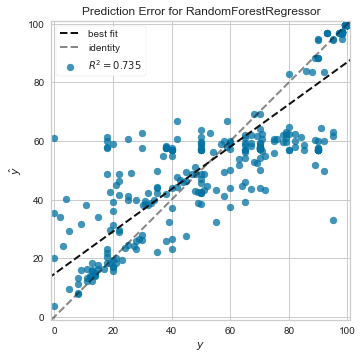

In [16]:
plot_model(tuned_rf, plot="error")

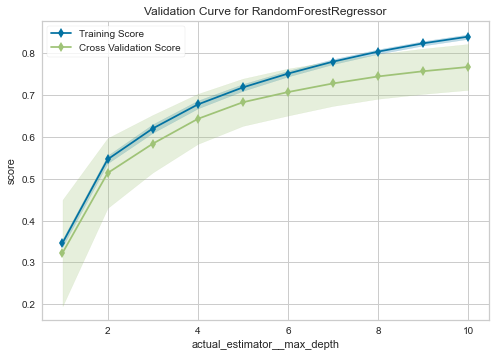

In [17]:
plot_model(tuned_rf, plot="vc")

In [18]:
pred_holdouts = predict_model(rf)
pred_holdouts.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,9.9508,240.959,15.5229,0.7448,0.5149,0.3434


,Core_size,Zeta Potential,Dosage,Absorbance,Duration_h,NPs_Type_AL,NPs_Type_Ag,NPs_Type_Au,NPs_Type_Cas_GA,NPs_Type_CdSe,...,Antiox_Medium_solution,Shape_Cubic,Shape_Dendrimer,Shape_Rod,Shape_Spherical,Shape_triangular,Synthesis Tech_Chemical,Coating_Coated,DPPH,Label
0,11.400000,-35.000000,0.040000,517.0,0.50,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,28.0,22.187000
1,60.000000,-8.199879,50000.000000,517.0,0.50,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,70.0,61.875841
2,8.000000,-8.199879,25000.000000,517.0,0.50,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,100.0,100.000000
3,60.000000,-8.199879,50000.000000,517.0,0.50,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,40.0,53.796606
4,71.199997,-8.199879,16269.197266,516.0,1.39,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,13.0,12.990000


In [19]:
new_train = train.copy()

In [20]:
new_train.drop(['DPPH'], axis=1, inplace=True)

In [21]:
predict_new = predict_model(best_model,new_train)

In [22]:
predict_new.head()

,NPs_Type,Antiox_Medium,Core_size,Shape,Zeta Potential,Synthesis Tech,Coating,Dosage,Absorbance,Duration_h,Label
0,Chs_PVA_ZnO,solution,297.0,Rod,NaN,Chemical,uncoated,15.0,517.0,0.5,19.86
1,Chs_PVA_ZnO,solution,297.0,Rod,NaN,Chemical,uncoated,25.0,517.0,0.5,26.09
2,Chs_PVA_ZnO,solution,297.0,Rod,NaN,Chemical,uncoated,50.0,517.0,0.5,36.92
3,Chs_PVA_ZnO,solution,297.0,Rod,NaN,Chemical,uncoated,100.0,517.0,0.5,41.88
4,Chs_PVA_ZnO,solution,297.0,Rod,NaN,Chemical,uncoated,200.0,517.0,0.5,60.20


In [23]:
save_model(rf, model_name='rf')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='DPPH',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='m...
                  RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                        criterion='mse', max_depth=None,
                                        max_features='auto', max_leaf_nodes=None,
                                        max_samples=None,
                             